In [1]:
#Datos
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
df = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

In [3]:
df_test_id = df_test['id']

In [4]:
#Cargamos el dataset

# df = pd.read_csv('hotels_train.csv')
# df.head(5)

In [5]:
# df_test = pd.read_csv('hotels_test.csv')

Limpiamos los valores faltantes (Ya sabemos cuales son las columnas con valores faltantes, asi que no es necesario mostrar todo de nuevo)

In [6]:
df = df.dropna(subset=['children'])
df['country'] = df['country'].fillna('Unknown/Desconocido')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna('Ninguno/None')

<ipython-input-6-6b64ca15953c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna('Unknown/Desconocido')
<ipython-input-6-6b64ca15953c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent'] = df['agent'].fillna(0)
<ipython-input-6-6b64ca15953c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Y lo mismo para el test: 

In [7]:
def mostrar_nulos(nulos_por_columna):
  # Ordena las columnas por cantidad de datos faltantes de menor a mayor
  nulos_por_columna_ordenado = nulos_por_columna.sort_values(ascending=True)

  print("La cantidad de datos faltante por cada columna del dataset es:\n\n", nulos_por_columna_ordenado)

In [8]:
nulos_por_columna_hotels = df_test.isna().sum()
mostrar_nulos(nulos_por_columna_hotels)

La cantidad de datos faltante por cada columna del dataset es:

 hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
reservation_status_date               0
distribution_channel                  0
is_repeated_guest                     0
meal                                  0
babies                                0
children                              0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_week_number              0
arrival_date_mo

In [9]:
df_test['country'] = df_test['country'].fillna('Unknown/Desconocido')
df_test['agent'] = df_test['agent'].fillna(0)
df_test['company'] = df_test['company'].fillna('Ninguno/None')

Elimino duplicados: 

In [10]:
df = df.drop_duplicates()
df_test = df_test.drop_duplicates()

Veamos como quedó: 

In [11]:
df.shape

(61909, 32)

In [12]:
df_test.shape

(26535, 31)

In [13]:
df.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [14]:
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,Ninguno/None,0,Transient,115.50,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0.0,Ninguno/None,0,Transient,42.00,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,Ninguno/None,0,Transient,229.00,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,Ninguno/None,0,Transient,75.00,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,Ninguno/None,0,Transient-Party,75.00,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,240.0,Ninguno/None,0,Transient,48.00,0,1,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0.0,Ninguno/None,0,Transient,149.00,0,0,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0.0,153.0,0,Transient,95.00,0,0,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,96.0,Ninguno/None,0,Transient,36.05,0,0,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


El objetivo es convertir todas las variables categóricas en numéricas y que la unica variable que quede es is_canceled ya que es la variable a predecir.

In [15]:
df_aux = df.copy()


Modificamos 'arrival_date_month': 

In [16]:
df_test['arrival_date_month'] = pd.Categorical(df_test['arrival_date_month']).codes

df_aux['arrival_date_month'] = pd.Categorical(df_aux['arrival_date_month']).codes

Realizamos one hot encoding para la variable hotel:

In [17]:
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['hotel'], drop_first=True )], axis=1)
df_aux.drop(['hotel'], axis='columns', inplace=True) 


In [18]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['hotel'], drop_first=True )], axis=1)
df_test.drop(['hotel'], axis='columns', inplace=True) 

Genero One hot Encodig para la variable market_segment:

In [19]:
lista_market_segment_mayoritarios = df_aux['market_segment'].value_counts().nlargest(5).index.tolist()
lista_market_segment_mayoritarios

['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate']

In [20]:
df_aux['market_segment'] = pd.Series(np.where(~df_aux['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', df_aux['market_segment']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['market_segment'], drop_first=True )], axis=1)
df_aux.drop(['market_segment'], axis='columns', inplace=True)

In [21]:
df_test['market_segment'] = pd.Series(np.where(~df_test['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', df_test['market_segment']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['market_segment'], drop_first=True )], axis=1)
df_test.drop(['market_segment'], axis='columns', inplace=True)

Genero One hot Encodig para la variable distribution_channel: 

In [22]:
df_aux['distribution_channel']= df_aux['distribution_channel'].replace('Direct','direct_channel')
df_test['distribution_channel']= df_test['distribution_channel'].replace('Direct','direct_channel')

In [23]:
lista_distribution_channel_mayoritarios = df_aux['distribution_channel'].value_counts().nlargest(3).index.tolist()
lista_distribution_channel_mayoritarios
df_aux['distribution_channel'] = pd.Series(np.where(~df_aux['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', df_aux['distribution_channel']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['distribution_channel'], drop_first=True )], axis=1)
df_aux.drop(['distribution_channel'], axis='columns', inplace=True)
df_test['distribution_channel'] = pd.Series(np.where(~df_test['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', df_test['distribution_channel']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['distribution_channel'], drop_first=True )], axis=1)
df_test.drop(['distribution_channel'], axis='columns', inplace=True)

In [24]:
df_aux['reserved_room_type']

0        D
1        A
2        F
3        A
4        A
        ..
61908    A
61909    A
61910    A
61911    A
61912    D
Name: reserved_room_type, Length: 61909, dtype: object

Genero One Hot Encodig para la variable assigned_room_type

In [25]:
df_aux['assigned_room_type'].value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1052
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

In [26]:
df_test['assigned_room_type'].value_counts()

A    17218
D     5316
E     1576
F      764
G      517
C      445
B      439
H      135
I       66
K       54
P        5
Name: assigned_room_type, dtype: int64

In [27]:
lista_room_mayoritarios = df_aux['assigned_room_type'].value_counts().nlargest(3).index.tolist()
lista_room_mayoritarios
df_aux['assigned_room_type'] = pd.Series(np.where(~df_aux['assigned_room_type'].isin(lista_room_mayoritarios), 'room minoritarios', df_aux['assigned_room_type']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['assigned_room_type'], drop_first=True )], axis=1)
df_aux.drop(['assigned_room_type'], axis='columns', inplace=True)
df_test['assigned_room_type'] = pd.Series(np.where(~df_test['assigned_room_type'].isin(lista_room_mayoritarios), 'room minoritarios', df_test['assigned_room_type']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['assigned_room_type'], drop_first=True )], axis=1)
df_test.drop(['assigned_room_type'], axis='columns', inplace=True)

In [28]:
# df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['assigned_room_type'], drop_first=True )], axis=1)
# df_aux.drop(['assigned_room_type'], axis='columns', inplace=True) 

# df_test = pd.concat([df_test, pd.get_dummies(df_test['assigned_room_type'], drop_first=True )], axis=1)
# df_test.drop(['assigned_room_type'], axis='columns', inplace=True) 

Genero One Hot Encoding para la variable deposit_type:

In [29]:
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['deposit_type'], drop_first=True )], axis=1)
df_aux.drop(['deposit_type'], axis='columns', inplace=True) 

df_test = pd.concat([df_test, pd.get_dummies(df_test['deposit_type'], drop_first=True )], axis=1)
df_test.drop(['deposit_type'], axis='columns', inplace=True) 

Genero One Hot Encoding para la variable custome_type:  

In [30]:
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['customer_type'], drop_first=True )], axis=1)
df_aux.drop(['customer_type'], axis='columns', inplace=True) 

df_test = pd.concat([df_test, pd.get_dummies(df_test['customer_type'], drop_first=True )], axis=1)
df_test.drop(['customer_type'], axis='columns', inplace=True) 

Genero One Hot Encoding para la variable agent: 

In [31]:
lista_agent_mayoritarios = df_aux['agent'].value_counts().nlargest(9).index.tolist()
lista_agent_mayoritarios

[9.0, 0.0, 240.0, 1.0, 14.0, 6.0, 7.0, 250.0, 241.0]

In [32]:
df_aux['agent'] = pd.Series(np.where(~df_aux['agent'].isin(lista_agent_mayoritarios), 'otra agencia', df_aux['agent']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['agent'], drop_first=True )], axis=1)
df_aux.drop(['agent'], axis='columns', inplace=True) 

df_test['agent'] = pd.Series(np.where(~df_test['agent'].isin(lista_agent_mayoritarios), 'otra agencia', df_test['agent']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['agent'], drop_first=True )], axis=1)
df_test.drop(['agent'], axis='columns', inplace=True) 

Genero One Hot Enconding para la variable company:

In [33]:
lista_company_mayoritarios = df_aux['company'].value_counts().nlargest(1).index.tolist()
lista_company_mayoritarios

['Ninguno/None']

In [34]:
df_aux['company'] = pd.Series(np.where(~df_aux['company'].isin(lista_company_mayoritarios), 'con compay', df_aux['company']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['company'], drop_first=True )], axis=1)
df_aux.drop(['company'], axis='columns', inplace=True) 

df_test['company'] = pd.Series(np.where(~df_test['company'].isin(lista_company_mayoritarios), 'con compay', df_test['company']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['company'], drop_first=True )], axis=1)
df_test.drop(['company'], axis='columns', inplace=True) 

Ahora vamos a ver el analisis que haremos con la columna 'Country': 

In [35]:
df_aux['country'].value_counts()

PRT    27946
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 150, dtype: int64

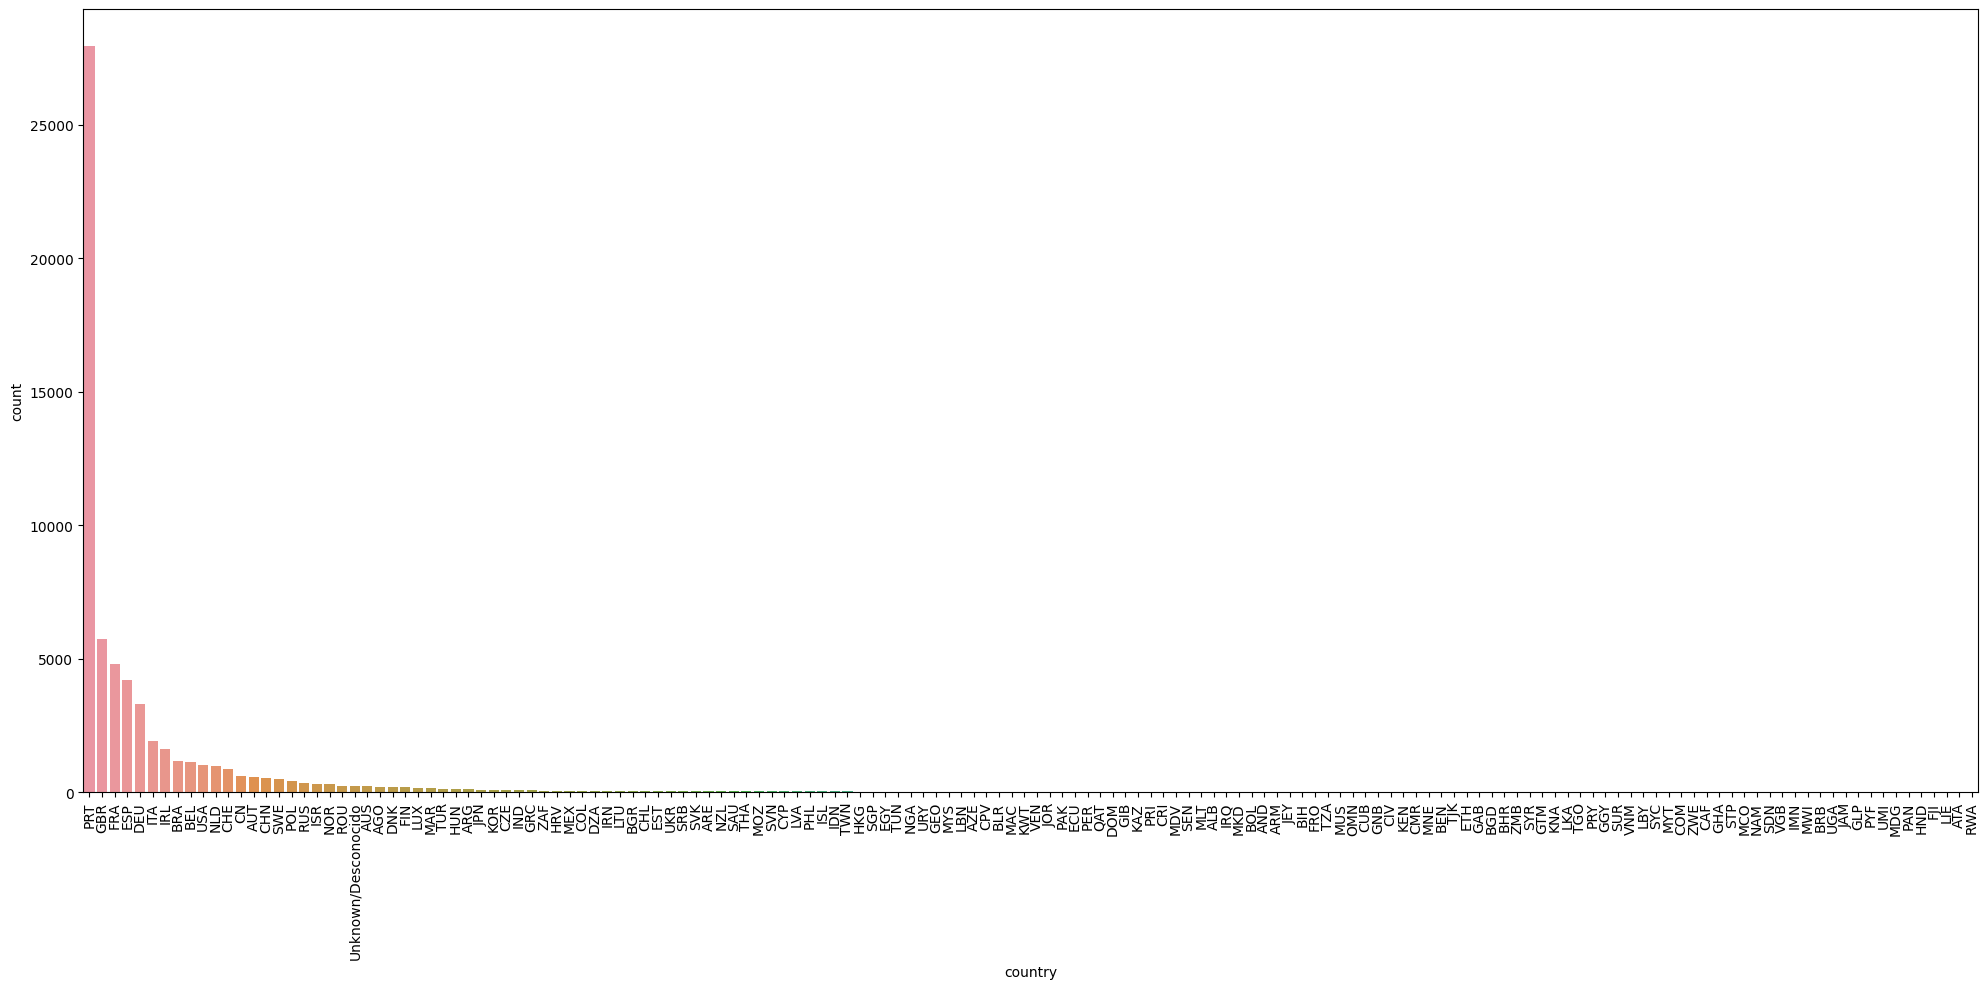

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=df_aux,order=df_aux['country'].value_counts().index)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [37]:
top_paises = df_aux['country'].value_counts().nlargest(10).index.tolist()
top_paises

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA']

In [38]:
df_aux['country'] = pd.Series(np.where(~df_aux['country'].isin(top_paises), 'Otro Pais', df_aux['country']))
df_aux = pd.concat([df_aux, pd.get_dummies(df_aux['country'], drop_first=True )], axis=1)
df_aux.drop(['country'], axis='columns', inplace=True) 

df_test['country'] = pd.Series(np.where(~df_test['country'].isin(top_paises), 'Otro Pais', df_test['country']))
df_test = pd.concat([df_test, pd.get_dummies(df_test['country'], drop_first=True )], axis=1)
df_test.drop(['country'], axis='columns', inplace=True) 

Elimino id porque no sive para nada: 

In [39]:
df_aux = df_aux.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

In [40]:
df_aux

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,BRA,DEU,ESP,FRA,GBR,IRL,ITA,Otro Pais,PRT,USA
0,49,2016,11,37,5,1,2,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,2015,10,44,31,0,1,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,25,2016,10,42,13,0,1,2,2.0,0,...,0,0,0,0,0,0,0,1,0,0
3,26,2016,2,51,12,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,104,2017,7,12,19,2,5,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,24,2017,4,4,27,0,2,2,0.0,0,...,0,0,0,0,0,0,0,1,0,0
61909,0,2016,11,36,2,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
61910,10,2017,8,19,8,1,2,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
61911,143,2015,10,41,10,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_test

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,BRA,DEU,ESP,FRA,GBR,IRL,ITA,Otro Pais,PRT,USA
0,277,2016,9,46,7,1,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,286,2016,8,20,11,0,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2016,1,35,23,0,1,3,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,196,2016,10,44,29,2,5,2,2.0,0,...,0,1,0,0,0,0,0,0,0,0
4,232,2016,9,48,26,2,1,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,31,2017,0,16,21,2,3,2,0.0,0,...,0,1,0,0,0,0,0,0,0,0
26531,130,2016,11,36,3,2,1,2,0.0,0,...,0,0,0,0,1,0,0,0,0,0
26532,45,2016,1,35,22,1,1,2,0.0,0,...,0,0,1,0,0,0,0,0,0,0
26533,164,2017,1,32,10,2,4,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
object_cols = df_aux.select_dtypes(include='object').columns.tolist()
print(object_cols)

['meal', 'reserved_room_type', 'reservation_status_date']


In [43]:
object_cols1 = df_test.select_dtypes(include='object').columns.tolist()
print(object_cols1)

['meal', 'reserved_room_type', 'reservation_status_date']


In [44]:
df_test['meal'] = pd.Categorical(df_test['meal']).codes

df_aux['meal'] = pd.Categorical(df_aux['meal']).codes

In [45]:
df_test['reserved_room_type'] = pd.Categorical(df_test['reserved_room_type']).codes

df_aux['reserved_room_type'] = pd.Categorical(df_aux['reserved_room_type']).codes

In [46]:
df_test['reservation_status_date'] = pd.Categorical(df_test['reservation_status_date']).codes

df_aux['reservation_status_date'] = pd.Categorical(df_aux['reservation_status_date']).codes

In [47]:
df_aux.columns = df_aux.columns.astype(str)
df_test.columns = df_test.columns.astype(str)

## PREPROCESAMIENTO HECHO

In [48]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [49]:

X = df_aux.drop('is_canceled', axis=1) 
y = df_aux.is_canceled


#Separacion Train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

In [50]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [51]:
#Entrenar el modelo
KNN_Classifier.fit(X_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(X_test)

In [52]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  10916
total:  12382


In [53]:
accuracy_score(y_test,y_pred)

0.8816023259570344

In [54]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

In [55]:
#Clasificador KNN
KNN_Classifier=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(KNN_Classifier, params_grid, scoring='accuracy', n_iter=1, random_state=5, verbose=1000)
rand.fit(X_train, y_train)
rand.cv_results_['mean_test_score']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance
[CV 1/5; 1/1] END algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance;, score=0.867 total time=   5.0s
[CV 2/5; 1/1] START algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance
[CV 2/5; 1/1] END algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance;, score=0.870 total time=   5.3s
[CV 3/5; 1/1] START algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance
[CV 3/5; 1/1] END algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance;, score=0.870 total time=   7.9s
[CV 4/5; 1/1] START algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance
[CV 4/5; 1/1] END algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance;, score=0.878 total time=   3.1s
[CV 5/5; 1/1] START algorithm=kd_tree, metric=euclidean, n_neighbors=17, weights=distance
[CV 5/5

array([0.87122187])

In [63]:
y_pred_train = rand.predict(X_test)

accuracy=accuracy_score(y_test,y_pred_train)
recall=recall_score(y_test,y_pred_train)
f1=f1_score(y_test,y_pred_train)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.876433532547246
Recall: 0.8108283352245097
f1 score: 0.8673487081671579


F1-Score: 0.8673487081671579


Text(50.722222222222214, 0.5, 'True')

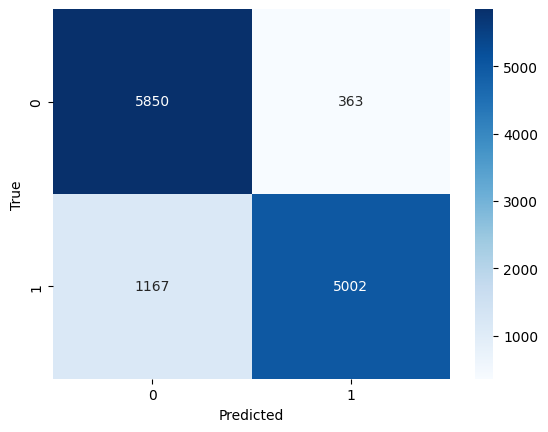

In [64]:
from sklearn.metrics import confusion_matrix, classification_report , f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_pred_train, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [57]:
rand.best_params_

{'weights': 'distance',
 'n_neighbors': 17,
 'metric': 'euclidean',
 'algorithm': 'kd_tree'}

In [58]:
from joblib import dump, load
dump(rand, 'knn_cv.joblib')

['knn_cv.joblib']

In [59]:
y_pred = rand.predict(df_test)

In [60]:
df_prediction = pd.DataFrame(zip(df_test_id,y_pred)).rename(columns={0: "id", 1: "is_canceled"})
df_prediction

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [61]:
df_prediction.to_csv('knn_prediction.csv', index=False)

In [62]:
df_aux.to_csv('knn_dataset_hotels_train.csv', index=False)